In [1]:
import numpy as np # Library for numerical computation
import pandas as pd # Library for data manipulation and processings

In [2]:
# Import data visualizing libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')

In [45]:
# Sklearn packages for machine learning in python
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import joblib

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
# Import the dataset
df = pd.read_csv('predictive_maintenance.csv')

In [6]:
# View the first five rows of the dataset
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [7]:
# Check the shape of the dataset
df.shape

(10000, 10)

In [8]:
df['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [9]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [10]:
df[(df['Target'] == 0) & (df['Failure Type'] != 'No Failure')]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [11]:
df = df[df['Failure Type'] != 'Random Failures']

In [12]:
df.shape

(9982, 10)

In [13]:
df.drop(['Product ID',"UDI","Failure Type"], axis=1, inplace=True)

In [14]:
# Summary statistics of the numerical features
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,300.003556,310.004208,1538.865057,39.980535,107.929473,0.033961
std,2.000506,1.483436,179.375123,9.966712,63.646655,0.181138
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9982 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9982 non-null   object 
 1   Air temperature [K]      9982 non-null   float64
 2   Process temperature [K]  9982 non-null   float64
 3   Rotational speed [rpm]   9982 non-null   int64  
 4   Torque [Nm]              9982 non-null   float64
 5   Tool wear [min]          9982 non-null   int64  
 6   Target                   9982 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 623.9+ KB


In [16]:
# Check for missing values
df.isna().sum().sort_values(ascending = False)

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

In [17]:
# Check for duplicate rows
df.duplicated().sum()

0

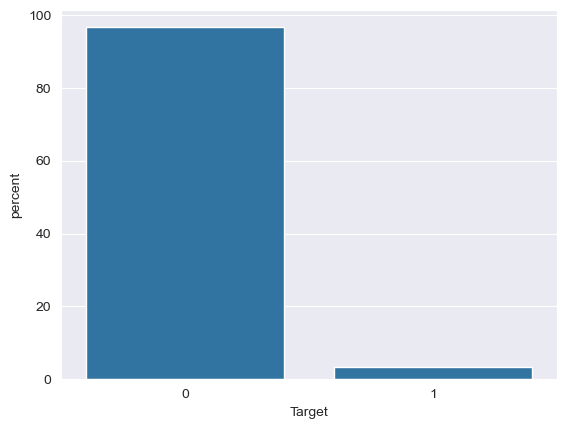

In [18]:
# Explore the target variable
# Check class distribution
sns.countplot(data=df, x='Target',stat="percent");

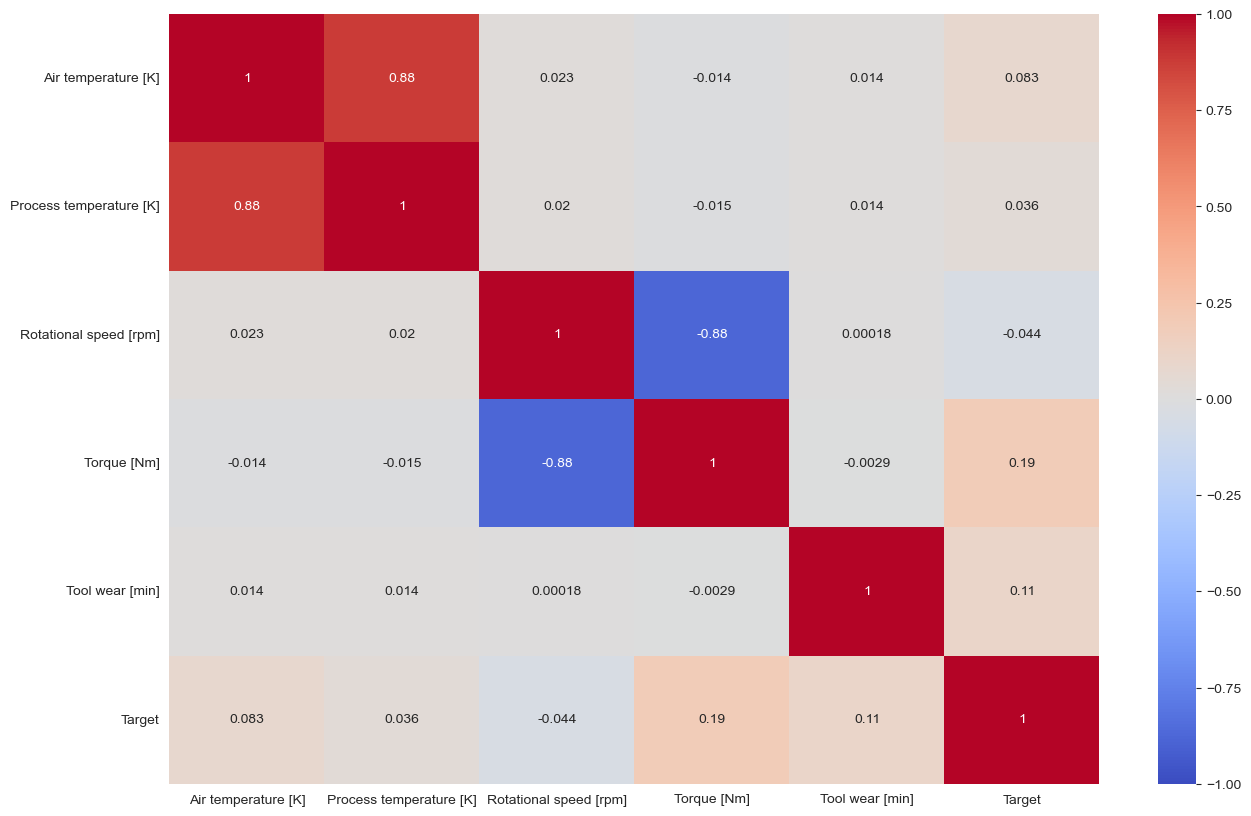

In [19]:
# Create a heatmap to visualize the correlation among numerical features

plt.figure(figsize = (15, 10))

sns.heatmap(df.corr(numeric_only=True), annot = True, vmin=-1, vmax=1, cmap='coolwarm');

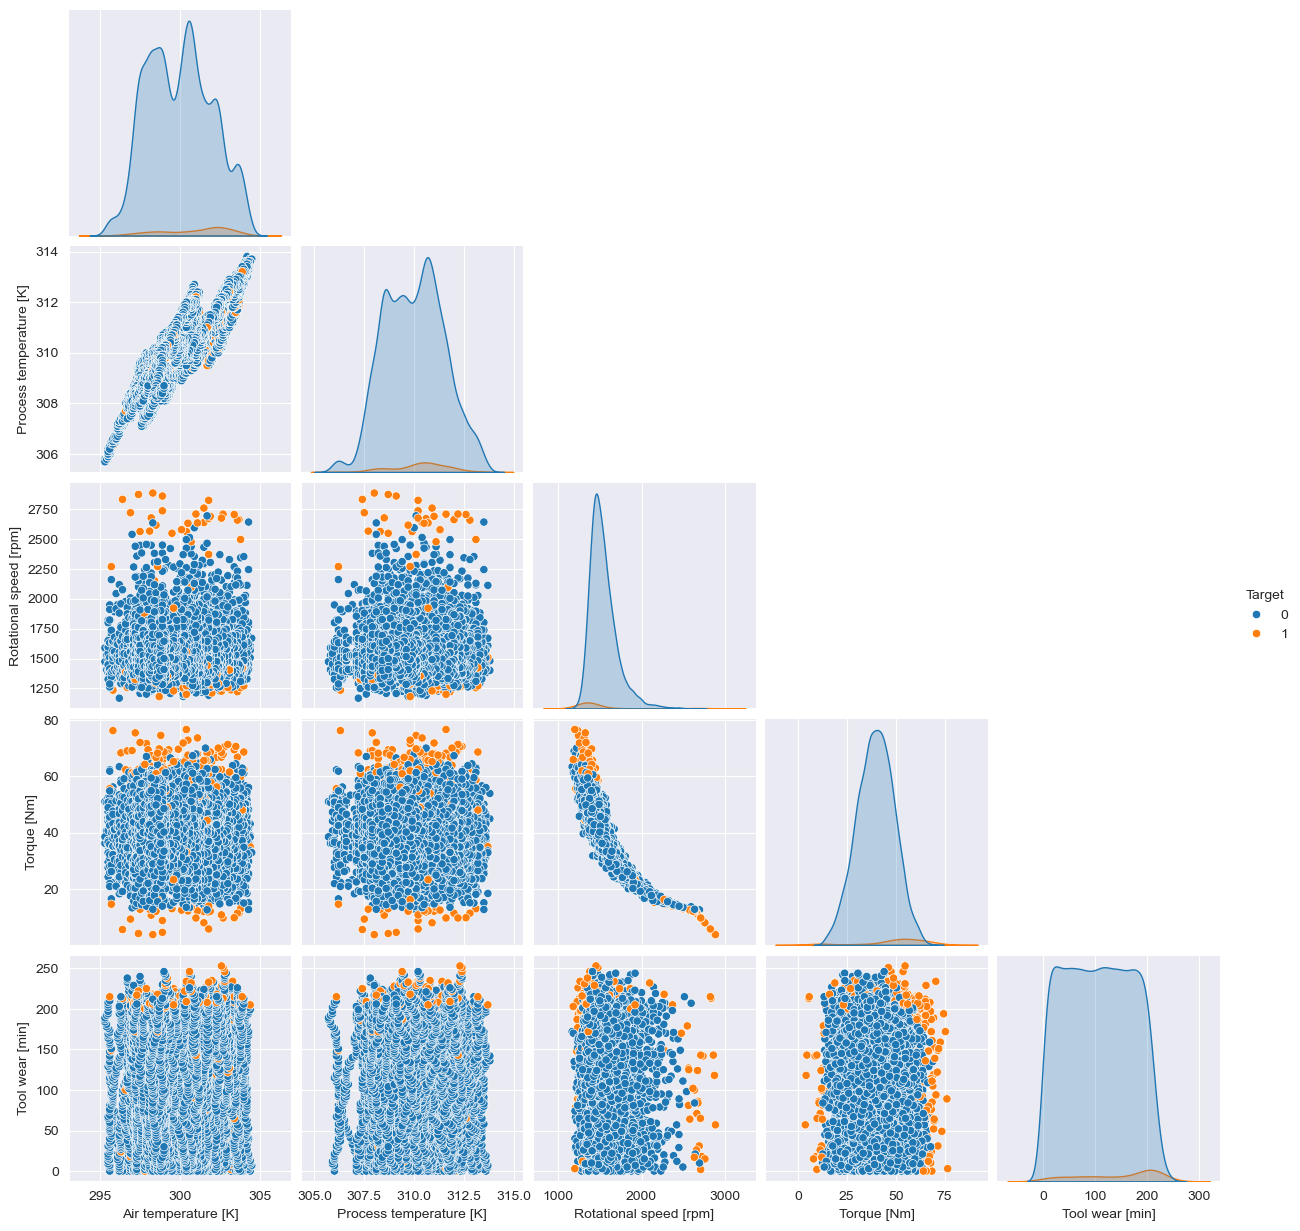

In [20]:
sns.pairplot(df, hue='Target', corner=True);

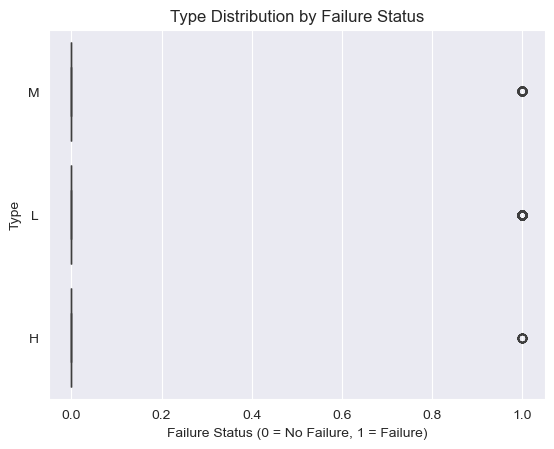

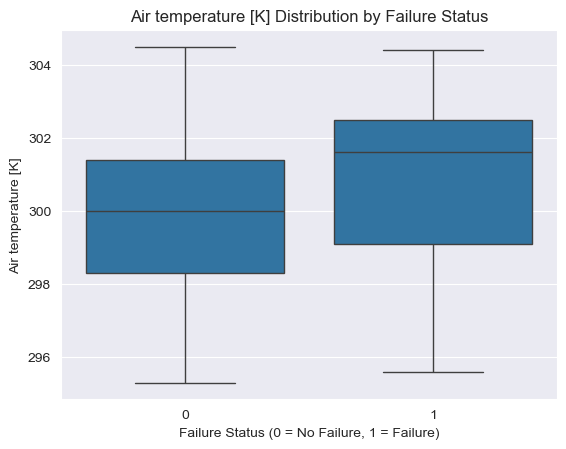

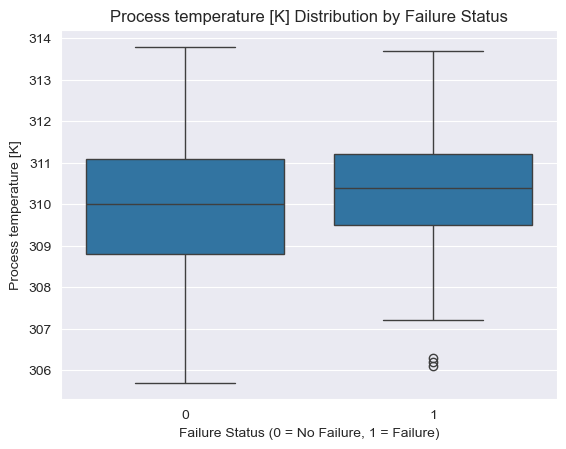

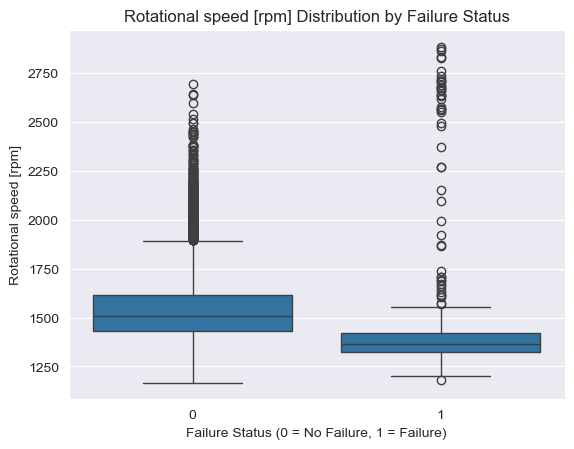

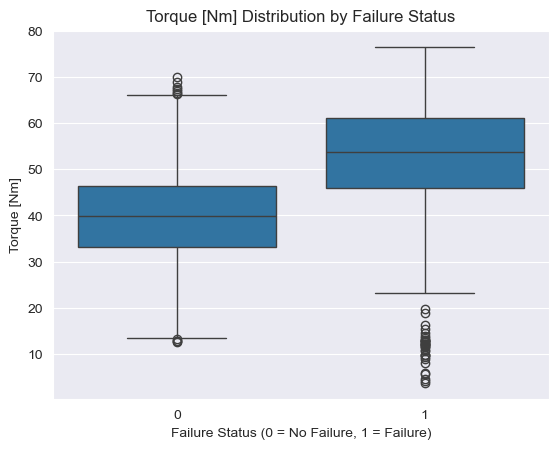

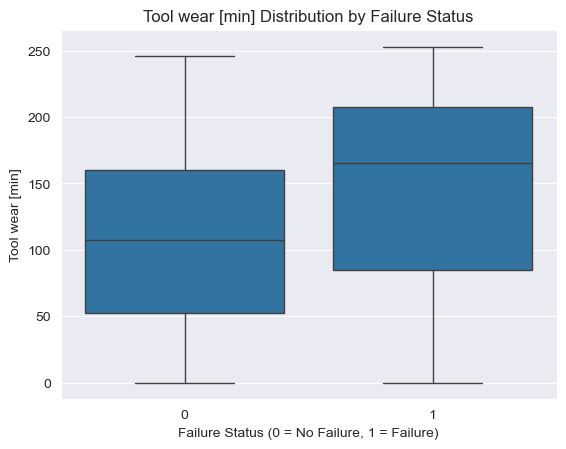

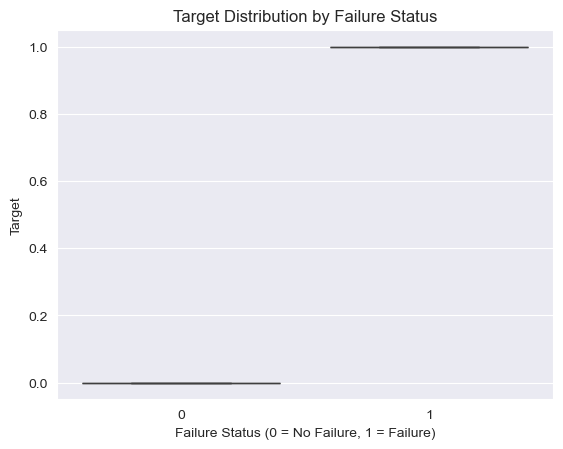

In [21]:
def box_target_plotter(data, target):
    for col in df.columns:
        sns.boxplot(data=data, x=target, y=col)
        plt.title(f'{col} Distribution by Failure Status')
        plt.xlabel('Failure Status (0 = No Failure, 1 = Failure)')
        plt.show()
        
box_target_plotter(df, "Target")

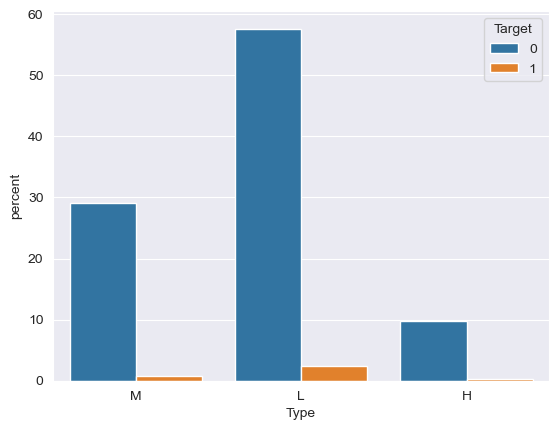

In [22]:
sns.countplot(data=df, x='Type',stat="percent", hue='Target');

In [23]:
# Separate features and target
X = df.drop(columns=['Target'])
y = df['Target']

In [24]:
# Define categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

In [25]:
numerical_columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [26]:
# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical columns
        ('cat', OrdinalEncoder(), categorical_columns)  # Encode categorical columns
    ]
)


In [27]:
# Create a pipeline for preprocessing and optionally a model
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [28]:
# Fit the pipeline on the data
pipeline.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['Type'], dtype='object'))]))])

In [29]:
# Save the pipeline for future use
joblib.dump(pipeline, 'preprocessing_pipeline.pkl')

['preprocessing_pipeline.pkl']

In [30]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14
9996,H,298.9,308.4,1632,31.8,17
9997,M,299.0,308.6,1645,33.4,22
9998,H,299.0,308.7,1408,48.5,25


In [31]:
# Transform the data
X_transformed = pipeline.transform(X)

In [32]:
X_transformed

array([[-0.95158489, -0.94663889,  0.06765459,  0.28290234, -1.69584527,
         2.        ],
       [-0.90159505, -0.87922444, -0.72959734,  0.63408889, -1.64870768,
         1.        ],
       [-0.95158489, -1.01405335, -0.22783039,  0.94513983, -1.61728261,
         1.        ],
       ...,
       [-0.50167629, -0.94663889,  0.5917223 , -0.66028439, -1.35016957,
         2.        ],
       [-0.50167629, -0.87922444, -0.72959734,  0.85483472, -1.30303198,
         0.        ],
       [-0.50167629, -0.87922444, -0.21668001,  0.02202091, -1.22446932,
         2.        ]])

In [33]:
# Split data into training and test sets (important to split before applying SMOTE to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [35]:
# Check the resampled class distribution
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution before SMOTE: Counter({0: 7714, 1: 271})
Class distribution after SMOTE: Counter({0: 7714, 1: 7714})


In [36]:
# Train the model
model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Balanced weights just as a safeguard
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [37]:
# Evaluate the model
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1929
           1       0.56      0.79      0.65        68

    accuracy                           0.97      1997
   macro avg       0.77      0.89      0.82      1997
weighted avg       0.98      0.97      0.97      1997



In [38]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1886   43]
 [  14   54]]


In [39]:
# ROC-AUC score
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9844555240447657


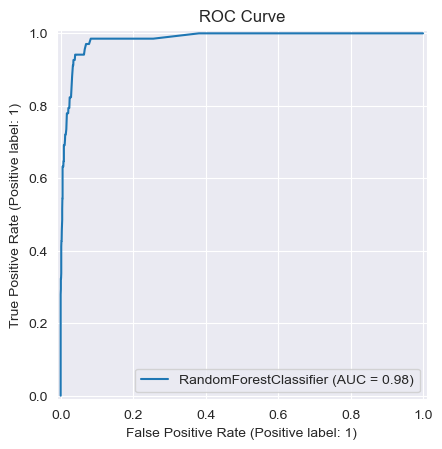

In [40]:
# Plot the ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve');

In [41]:
#pip install imbalanced-learn xgboost lightgbm


In [66]:
# Define models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'LightGBM': LGBMClassifier(class_weight='balanced', random_state=42)
}

In [67]:
# Stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

In [69]:
# Store results for comparison
results = {}

for model_name, model in models.items():
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline(steps=[
        ('smote', smote),
        ('model', model)
    ])
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_transformed, y, scoring='f1_weighted', cv=skf, n_jobs=-1)
    
    # Store the mean and standard deviation of AUC scores
    results[model_name] = {
        'Mean AUC': np.mean(cv_scores),
        'Std AUC': np.std(cv_scores)
    }
    
    print(f"{model_name}: Mean ROC-AUC = {np.mean(cv_scores):.4f}, Std = {np.std(cv_scores):.4f}")



Logistic Regression: Mean ROC-AUC = 0.8783, Std = 0.0072
Random Forest: Mean ROC-AUC = 0.9759, Std = 0.0029
LightGBM: Mean ROC-AUC = 0.9762, Std = 0.0037


In [70]:
# Print results for all models
print("\nSummary of Model Performance:")
for model_name, result in results.items():
    print(f"{model_name}: Mean ROC-AUC = {result['Mean AUC']:.4f}, Std = {result['Std AUC']:.4f}")



Summary of Model Performance:
Logistic Regression: Mean ROC-AUC = 0.8783, Std = 0.0072
Random Forest: Mean ROC-AUC = 0.9759, Std = 0.0029
LightGBM: Mean ROC-AUC = 0.9762, Std = 0.0037


In [71]:

# Choose the best model (e.g., by AUC) and evaluate on the test set
best_model_name = max(results, key=lambda k: results[k]['Mean AUC'])
best_model = models[best_model_name]

best_model_name

'LightGBM'

In [72]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

# Train the best model with SMOTE
pipeline = ImbPipeline(steps=[
    ('smote', smote),
    ('model', best_model)
])
pipeline.fit(X_train, y_train)



[LightGBM] [Info] Number of positive: 7714, number of negative: 7714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 15428, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('model',
                 LGBMClassifier(class_weight='balanced', random_state=42))])

In [73]:
# Evaluate on the test set
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Classification Report
print("\nBest Model:", best_model_name)
print("Classification Report:")
print(classification_report(y_test, y_pred))




Best Model: LightGBM
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1929
           1       0.61      0.91      0.73        68

    accuracy                           0.98      1997
   macro avg       0.80      0.95      0.86      1997
weighted avg       0.98      0.98      0.98      1997



In [74]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[1889   40]
 [   6   62]]


In [75]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9885493855395968


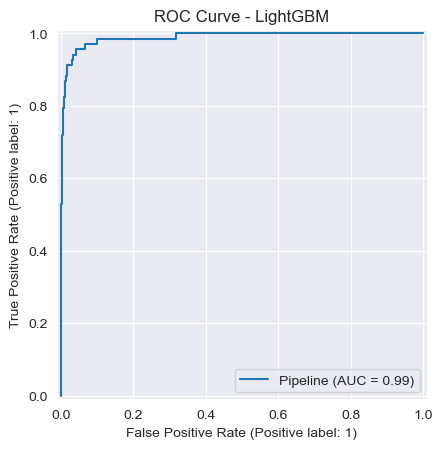

In [76]:

# Plot the ROC Curve
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title(f'ROC Curve - {best_model_name}')
plt.show()

In [77]:
joblib.dump(pipeline, 'failure_prediction_model.pkl')

['failure_prediction_model.pkl']

In [78]:
pipeline = joblib.load('failure_prediction_model.pkl')
sample_prediction = pipeline.predict(X_test[:1])
print(sample_prediction)

[0]


In [80]:
df[df['Target'] == 1]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
50,L,298.9,309.1,2861,4.6,143,1
69,L,298.9,309.0,1410,65.7,191,1
77,L,298.8,308.9,1455,41.3,208,1
160,L,298.4,308.2,1282,60.7,216,1
161,L,298.3,308.1,1412,52.3,218,1
...,...,...,...,...,...,...,...
9758,L,298.6,309.8,2271,16.2,218,1
9764,L,298.5,309.5,1294,66.7,12,1
9822,L,298.5,309.4,1360,60.9,187,1
9830,L,298.3,309.3,1337,56.1,206,1
